In [220]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use = 'default'
#pd.options.display.mpl_style = 'default'

In [242]:
df = pd.read_csv("/Users/sfox/Documents/GADataScience/Homework/Datasets/failunder_10000.csv")
df_baseanalysis = df

In [243]:
#Create derived columns:
#    1. totalFailPrice: the product of the total number of fails on a given day, multiplied by the price at which
#        the stock failed.
#    2. modifiedSettlementDate: Set the settlement date to the first day of the month and year 
#        in which settlment occurred.
#
df['totalFailPrice'] = df['QUANTITY (FAILS)']*df['PRICE']
df['modifiedSettlementDate'] = pd.to_datetime(df['SETTLEMENT DATE'].astype(str), format='%Y%m%d')
df['settlementMonth'] = df['modifiedSettlementDate'].dt.month
df['settlementYear'] = df['modifiedSettlementDate'].dt.year

In [244]:
#Drop the SETTLEMENT DATE, PRICE, and SYMBOL columns 
#once the modifiedSettlementDate column has been created:
df.drop(['PRICE','SYMBOL','SETTLEMENT DATE'],axis = 1, inplace = True)

In [254]:
#Create df_daily dataset.
#Summarize the quantity of fails and total fail price columns for a given day.
df_daily = df.groupby(['modifiedSettlementDate'])[['QUANTITY (FAILS)','totalFailPrice']].sum().reset_index()

In [255]:
#Begin analysis of df_daily dataset
print "Descriptive Statistics for df_daily dataset"
df_daily.describe()

Descriptive Statistics for df_daily dataset


,QUANTITY (FAILS),totalFailPrice
count,197.00,197.00
mean,"8,160,811.92","97,944,296.07"
std,"1,461,384.41","27,619,802.91"
min,"6,503,023.00","63,551,373.95"
25%,"7,293,998.00","82,048,843.53"
50%,"7,726,265.00","91,737,642.91"
75%,"8,489,755.00","102,433,153.10"
max,"14,467,315.00","230,354,379.26"


Visualizations of totalFailPrice and QUANTITY (FAILS) columns


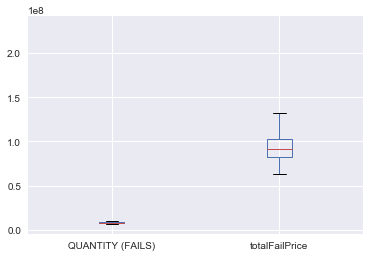

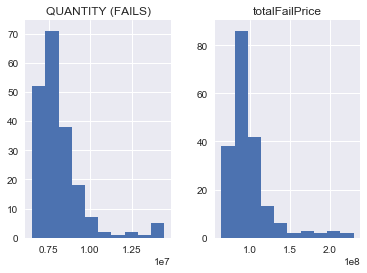

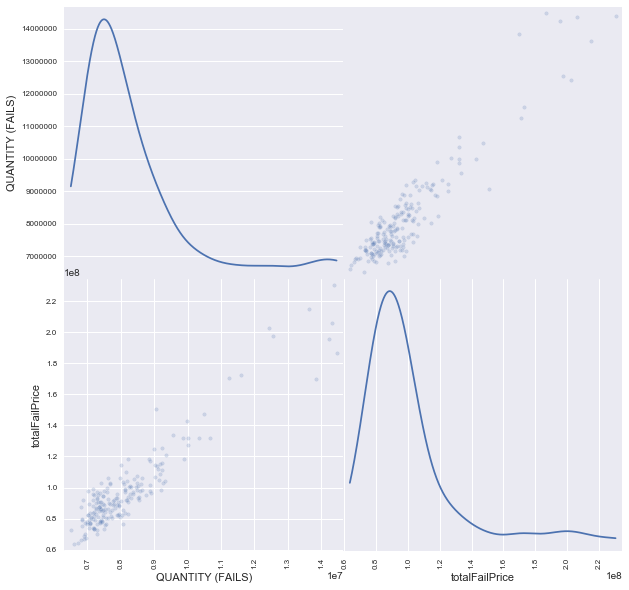

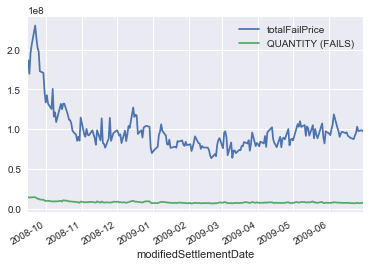

In [257]:
#Display visualizations for totalFailPrice and QUANTITY (FAILS) columns:
print "Visualizations of totalFailPrice and QUANTITY (FAILS) columns"
df_daily.boxplot()
df_daily.hist()
scatter_matrix(df_daily, alpha=0.2, figsize=(10, 10), diagonal='kde')
df_daily.plot(x="modifiedSettlementDate",y=["totalFailPrice","QUANTITY (FAILS)"])
#df_daily.plot(x="modifiedSettlementDate",y="totalFailPrice")
#df_daily.plot(x="modifiedSettlementDate",y="QUANTITY (FAILS)", color="green")

Visualizations of totalFailPrice column


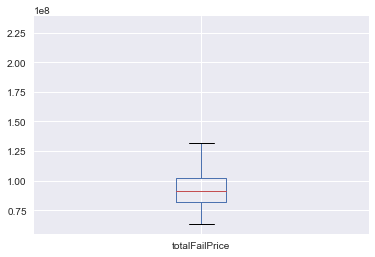

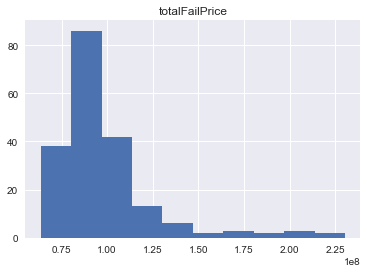

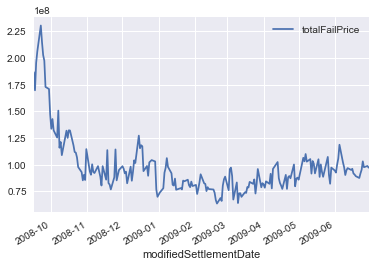

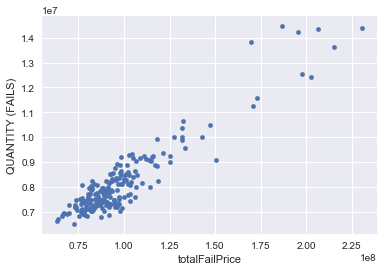

In [265]:
#Display visualizations for totalFailPrice column:
print "Visualizations of totalFailPrice column"
df_daily.boxplot(column="totalFailPrice")
df_daily.hist(column="totalFailPrice")
df_daily.plot(x="modifiedSettlementDate",y="totalFailPrice")
df_daily.plot(kind="scatter",x="totalFailPrice",y="QUANTITY (FAILS)")

Visualizations of QUANTITY (FAILS) column


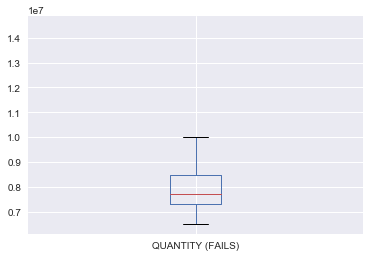

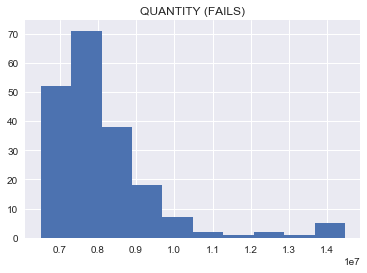

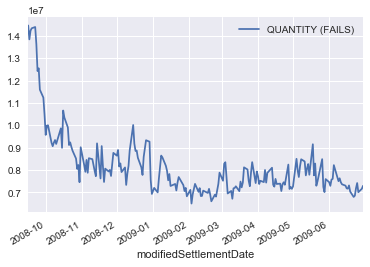

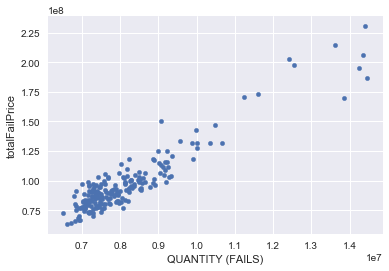

In [266]:
#Display visualizations for QUANTITY (FAILS) column:
print "Visualizations of QUANTITY (FAILS) column"
df_daily.boxplot(column="QUANTITY (FAILS)")
df_daily.hist(column="QUANTITY (FAILS)")
df_daily.plot(x="modifiedSettlementDate",y="QUANTITY (FAILS)")
df_daily.plot(kind="scatter",x="QUANTITY (FAILS)",y="totalFailPrice")